In [8]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
from deep_visual_odometry.kitti_utils import KITTIdata
from matplotlib import pyplot as plt

In [10]:
basedir = 'dataset'
kitti_data = KITTIdata(basedir, sequences = ['01'], img_size=(150,50))

completed load sequence 01 data


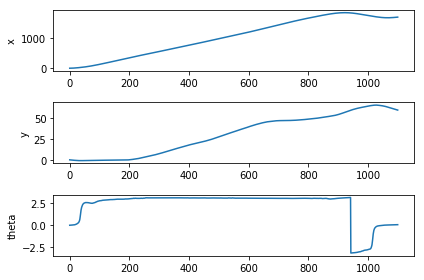

In [11]:
plt.figure()
ylabels = ['x','y','theta']
for i in range(3):
    plt.subplot(3,1, i+1)
    plt.plot(kitti_data.poses['01'][:,i])
    plt.ylabel(ylabels[i])
plt.tight_layout()

In [12]:
inputs, velocities = kitti_data.load_data_input_model()

In [14]:
np.random.seed(100)
mask = np.arange(inputs.shape[0])
np.random.shuffle(mask)
inputs = inputs[mask]
velocities = velocities[mask]
num_validation = int(inputs.shape[0]/15)
num_training = inputs.shape[0] - num_validation

X_train, y_train = inputs[:num_training], velocities[:num_training]
X_val, y_val = inputs[num_training:], velocities[num_training:]

mean_image = np.mean(X_train, axis = 0)
std_image = np.std(X_train, axis = 0)

# Normalizing X
X_train = X_train - mean_image
X_val = X_val - mean_image
X_train /= std_image
X_val /= std_image
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)


# Normalizing y
mean_y = np.mean(y_train, axis = 0)
std_y = np.std(y_train, axis = 0)
y_train = y_train - mean_y
y_val = y_val - mean_y
y_train /= std_y
y_val /=std_y

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1027, 50, 150, 6)
(1027, 2)
(73, 50, 150, 6)
(73, 2)


In [18]:
from deep_visual_odometry.input_model import training
tf.reset_default_graph()
training(X_train, y_train, X_val, y_val, 
         conv_featmap=[16,16,16,16],
         fc_units=[128,128],
         conv_kernel_size=[7,5,5,5],
         pooling_size=[2,2,2,2],
         l2_norm=0.001,
         seed=235,
         learning_rate=1e-5,
         epoch=20,
         batch_size=150,
         verbose=False,
         pre_trained_model=None)

Building velocity CNN. Parameters: 
conv_featmap=[16, 16, 16, 16]
fc_units=[128, 128]
conv_kernel_size=[7, 5, 5, 5]
pooling_size=[2, 2, 2, 2]
l2_norm=0.001
seed=235
learning_rate=1e-05
number of batches for training: 6
epoch 1 
Best validation error! iteration:1 valid_error: 0.5009045600891113
Best validation error! iteration:6 valid_error: 0.49389466643333435
epoch 2 
Best validation error! iteration:7 valid_error: 0.4898904263973236
Best validation error! iteration:10 valid_error: 0.48944610357284546
Best validation error! iteration:12 valid_error: 0.4739430546760559
epoch 3 


KeyboardInterrupt: 

In [ ]:
from deep_visual_odometry.input_model import test_input_model
out = test_input_model("CNN_Velocity_Model",X_val,y_val)

In [ ]:
# error = out-y_val
# print(f'recalculated validation mse is {np.linalg.norm(error)/num_validation}')
# print(f'validation mse if the rotational part is ignored {np.linalg.norm(error[:,0])/num_validation}')

In [ ]:
out = test_input_model("CNN_Velocity_Model",X_val,y_val)

In [ ]:
plt.scatter(y_val[:,0],out[:,0])
plt.show()

In [ ]:
plt.scatter(y_val[:,1],out[:,1])
plt.show()

In [ ]:
out[:,1]